15. This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [1]:
library(ggplot2)
library(ISLR2)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
print(colSums(is.na(Boston)))

   crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
      0       0       0       0       0       0       0       0       0       0 
ptratio   lstat    medv 
      0       0       0 


In [3]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


In [4]:
str(Boston)

'data.frame':	506 obs. of  13 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


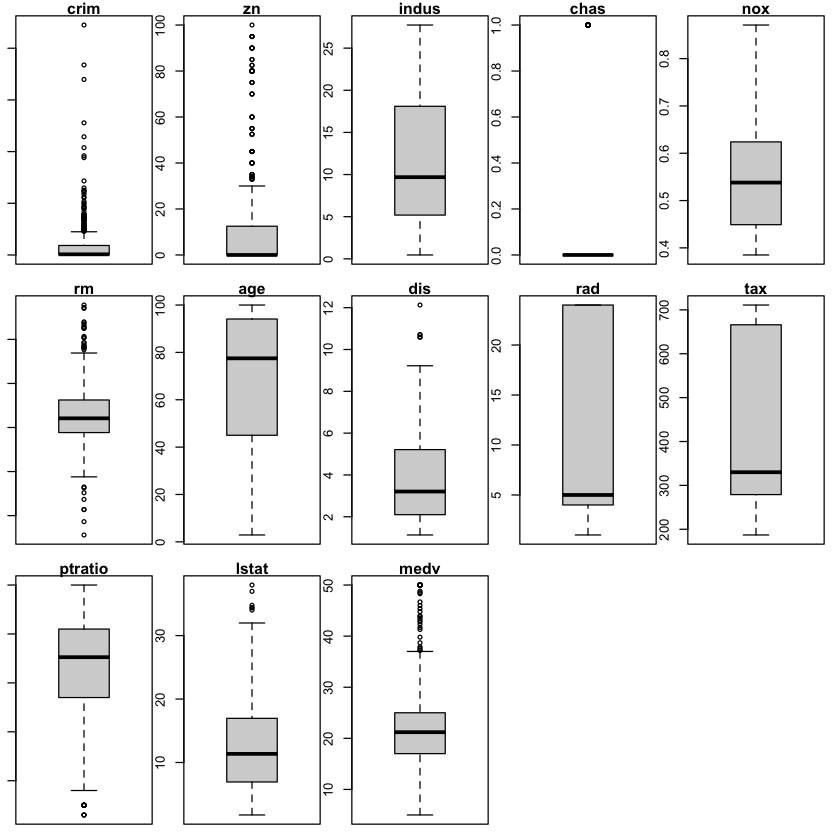

In [5]:
predictors <- names(Boston)
par(mfrow = c(3, 5), mar = c(1, 1, 1, 1))
for (i in 1:13) {
    boxplot(Boston[, predictors[i]], main = predictors[i])
}

(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [70]:
fit_each_predictor <- function(df, response = "crim") {
    predictors <- names(df)
    predictors <- predictors[predictors != response]
    summary_list <- list()
    fit_list <- list()
    for (p in predictors) {
        fit <- lm(df[, response] ~ df[, p])
        summary_list[[p]] <- summary(fit)
        fit_list[[p]] <- fit
    }
    output <- list(summary_list = summary_list, fit_results = fit_list)
    return(output)
}

extract_stats <- function(summary_list, alpha = 0.05) {
    predictors <- names(summary_list)
    df <- data.frame()
    for (i in seq(1, length(predictors))) {
        df <- rbind(df, t(summary_list[[predictors[i]]]$coefficients[2, ]))
    }
    df$significant <- df[, names(df)[ncol(df)]] < alpha
    row.names(df) <- predictors
    return(df)
}

In [73]:
results <- fit_each_predictor(Boston)
slr_results <- extract_stats(results$summary_list)
slr_results

,Estimate,Std. Error,t value,Pr(>|t|),significant
,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
zn,-0.07393498,0.016094596,-4.593776,5.506472e-06,TRUE
indus,0.50977633,0.051024332,9.990848,1.450349e-21,TRUE
chas,-1.89277655,1.506115484,-1.256727,2.094345e-01,FALSE
nox,31.24853120,2.999190381,10.418989,3.751739e-23,TRUE
rm,-2.68405122,0.532041083,-5.044819,6.346703e-07,TRUE
age,0.10778623,0.012736436,8.462825,2.854869e-16,TRUE
dis,-1.55090168,0.168330031,-9.213458,8.519949e-19,TRUE
rad,0.61791093,0.034331820,17.998199,2.693844e-56,TRUE
tax,0.02974225,0.001847415,16.099388,2.357127e-47,TRUE


We can use each fitted model and testing the hypothesis $H_0: \beta_j = 0$, where $j$ is a predictor, and $\beta_j$ is the slope coefficient in the linear formula.

Since we use a single linear regression for each predictor, we extract the information for the $t$-statistic to determine whether or not we should reject this null hypothesis. 
The $p$-values corresponding to the $t$-statistic are very low for most of the predictors. The column `significant` gives the values `T` or `F` depending the corresponding $p$-value is lower than the `alpha = 0.05` used.

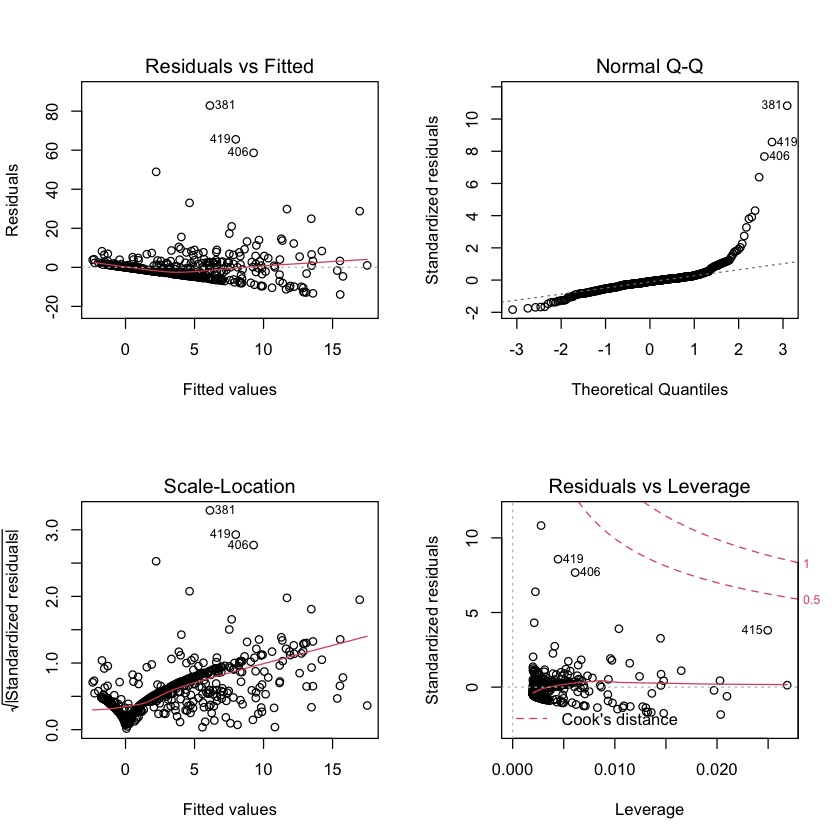

In [18]:
par(mfrow = c(2, 2))
plot(results$fit_results$lstat)

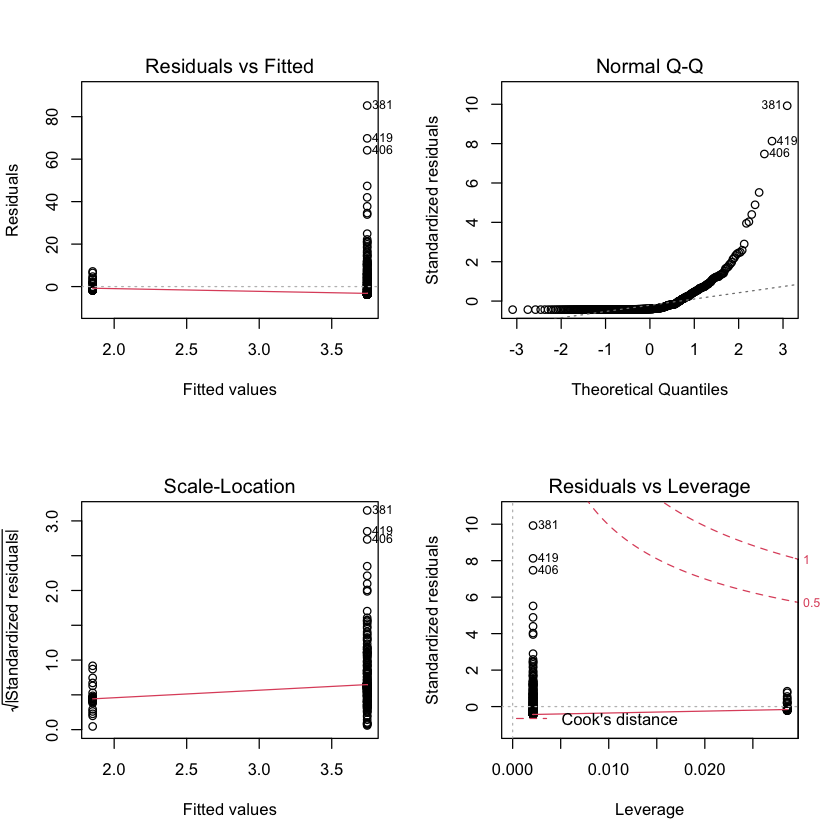

In [19]:
par(mfrow = c(2, 2))
plot(results$fit_results$chas)

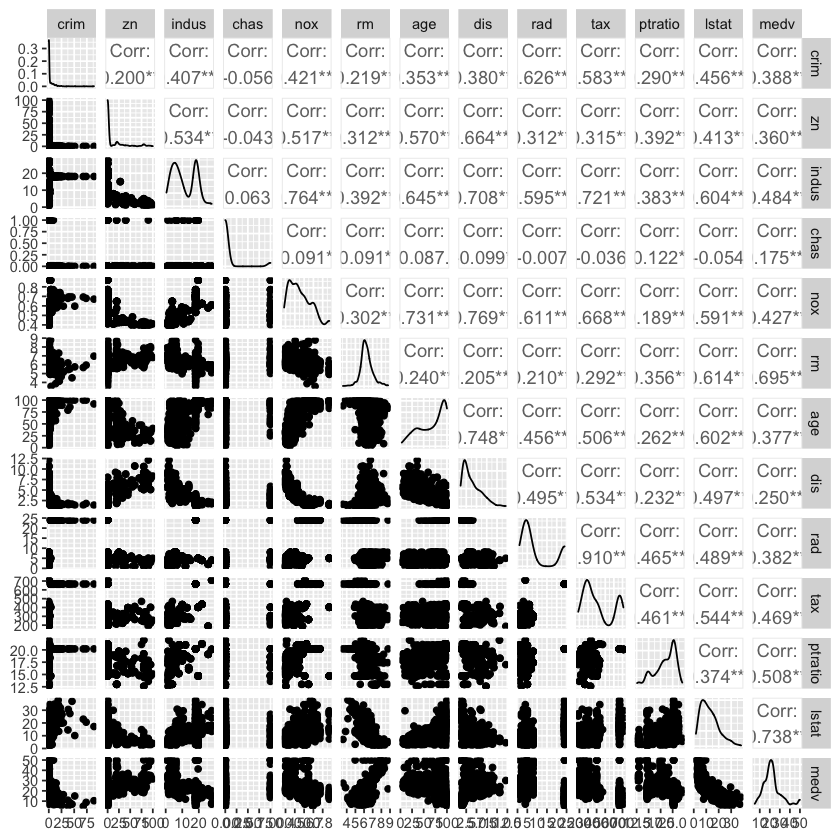

In [8]:
ggpairs(Boston)

(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : \beta_j = 0$?

In [74]:
mlr_results <- summary(lm(crim ~ ., data = Boston))
mlr_results


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-8.534 -2.248 -0.348  1.087 73.923 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.7783938  7.0818258   1.946 0.052271 .  
zn           0.0457100  0.0187903   2.433 0.015344 *  
indus       -0.0583501  0.0836351  -0.698 0.485709    
chas        -0.8253776  1.1833963  -0.697 0.485841    
nox         -9.9575865  5.2898242  -1.882 0.060370 .  
rm           0.6289107  0.6070924   1.036 0.300738    
age         -0.0008483  0.0179482  -0.047 0.962323    
dis         -1.0122467  0.2824676  -3.584 0.000373 ***
rad          0.6124653  0.0875358   6.997 8.59e-12 ***
tax         -0.0037756  0.0051723  -0.730 0.465757    
ptratio     -0.3040728  0.1863598  -1.632 0.103393    
lstat        0.1388006  0.0757213   1.833 0.067398 .  
medv        -0.2200564  0.0598240  -3.678 0.000261 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard 

According to the $p$-values associated with each $t$-statistic we could reject the null hypothesis for all the predictors, except `tax`.

Now, the overall $F$-statistic has a very low $p$-value for which we could not reject the hypothesis for any of the predictors. Remember that the $F$-statistic is more robust than the $t$ when it comes to multiple regression.

The $R^2$ value suggests that only about 45% of the variation around the regression can be explained with the model.

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the $x$-axis, and the multiple regression coefficients from (b) on the $y$-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the $x$-axis, and its coefficient estimate in the multiple linear regression model is shown on the $y$-axis.

In [99]:
cbind(slr_results, mlr_results$coefficients[2:nrow(mlr_results$coefficients), ])

,Estimate,Std. Error,t value,Pr(>|t|),significant,Estimate,Std. Error,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
zn,-0.07393498,0.016094596,-4.593776,5.506472e-06,TRUE,0.0457100386,0.018790325,2.4326370,1.534403e-02
indus,0.50977633,0.051024332,9.990848,1.450349e-21,TRUE,-0.0583501107,0.083635091,-0.6976750,4.857094e-01
chas,-1.89277655,1.506115484,-1.256727,2.094345e-01,FALSE,-0.8253775522,1.183396256,-0.6974651,4.858406e-01
nox,31.24853120,2.999190381,10.418989,3.751739e-23,TRUE,-9.9575865471,5.289824241,-1.8824040,6.036986e-02
rm,-2.68405122,0.532041083,-5.044819,6.346703e-07,TRUE,0.6289106622,0.607092391,1.0359390,3.007385e-01
age,0.10778623,0.012736436,8.462825,2.854869e-16,TRUE,-0.0008482791,0.017948208,-0.0472626,9.623231e-01
dis,-1.55090168,0.168330031,-9.213458,8.519949e-19,TRUE,-1.0122467382,0.282467566,-3.5835857,3.725942e-04
rad,0.61791093,0.034331820,17.998199,2.693844e-56,TRUE,0.6124653115,0.087535764,6.9967438,8.588123e-12
tax,0.02974225,0.001847415,16.099388,2.357127e-47,TRUE,-0.0037756465,0.005172346,-0.7299678,4.657565e-01


On the left of the `significant` columns are the single regression results, and on the right the multiple regression results.

For the SR for instance, the `zn` coefficient changes in magnitud and in sign. This could be related to the way multiple regression procede with the fit procedure, taking into account all the predictors in the model, and forcing each individual predictor to change compared to the standalone version of single regression.

It seems that in by considering all the predictors in the model the $p$-values are now higher in comparison to the SR cases, as the coefficients are now more restricted on the values they can take.

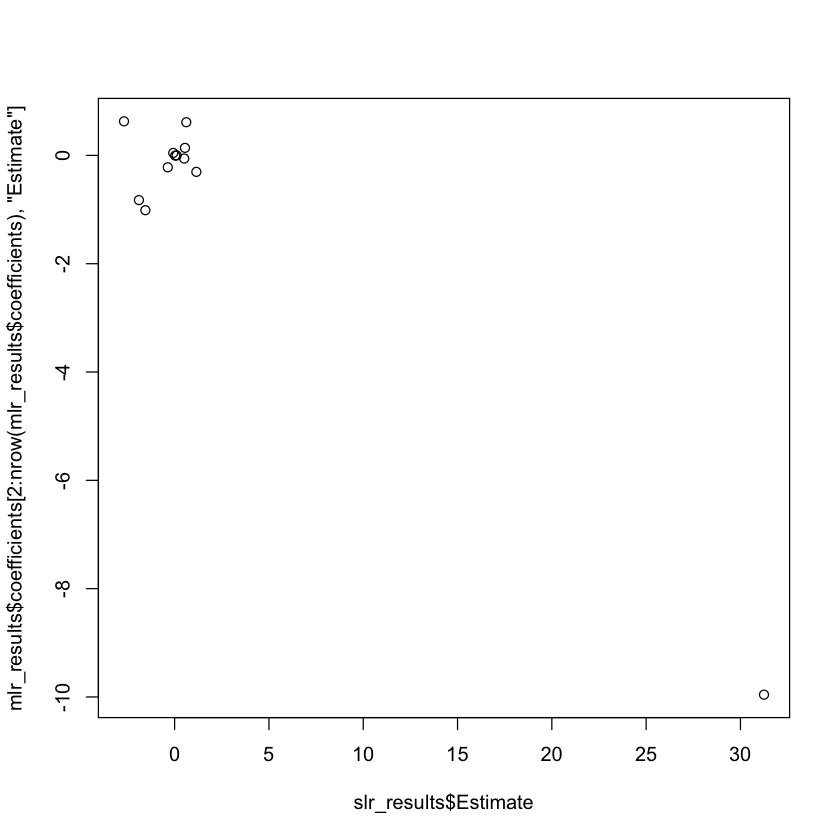

In [100]:
plot(
    slr_results$Estimate, 
    mlr_results$coefficients[2:nrow(mlr_results$coefficients), "Estimate"])

The estimate of the `nox` coefficient changes drastically from its value of 31 in the SR to a value of -10 in the MR.

(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form

$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \epsilon$.

In [170]:
fit_each_predictor_poly <- function(df, response = "crim", degree = 3, remove_predictors = c(NA)) {
    predictors <- names(df)
    predictors <- predictors[!(predictors %in% remove_predictors)]
    predictors <- predictors[predictors != response]
    summary_list <- list()
    fit_list <- list()
    for (p in predictors) {
        cat("Predictor:", p, "\n")
        fit <- lm(df[, response] ~ poly(df[, p], degree = degree))
        summary_list[[p]] <- summary(fit)
        fit_list[[p]] <- fit
    }
    output <- list(summary_list = summary_list, fit_results = fit_list)
    return(output)
}

extract_stats_poly <- function(summary_list, alpha = 0.05, degree = 3) {
    predictors <- names(summary_list)
    df <- data.frame()
    row_names <- character()
    for (i in seq(1, length(predictors))) {
        df <- rbind(df, summary_list[[predictors[i]]]$coefficients[2:4, ])
        row_names <- append(row_names, paste0(rep(predictors[i], degree), seq(degree)))
    }
    df$significant <- df[, names(df)[ncol(df)]] < alpha
    row.names(df) <- row_names
    return(df)
}

In [159]:
res_nonlinear <- fit_each_predictor_poly(Boston, remove_predictors = c("chas"))

Predictor: zn 
Predictor: indus 
Predictor: nox 
Predictor: rm 
Predictor: age 
Predictor: dis 
Predictor: rad 
Predictor: tax 
Predictor: ptratio 
Predictor: lstat 
Predictor: medv 


In [171]:
extract_stats_poly(res_nonlinear$summary_list)

,Estimate,Std. Error,t value,Pr(>|t|),significant
,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
zn1,-38.749835,8.372207,-4.6283894,4.697806e-06,TRUE
zn2,23.939832,8.372207,2.8594409,4.420507e-03,TRUE
zn3,-10.071868,8.372207,-1.2030123,2.295386e-01,FALSE
indus1,78.590819,7.423121,10.5873014,8.854243e-24,TRUE
indus2,-24.394796,7.423121,-3.2863261,1.086057e-03,TRUE
indus3,-54.129763,7.423121,-7.2920492,1.196405e-12,TRUE
nox1,81.372015,7.233605,11.2491649,2.457491e-26,TRUE
nox2,-28.828594,7.233605,-3.9853703,7.736755e-05,TRUE
nox3,-60.361894,7.233605,-8.3446489,6.961110e-16,TRUE
